# Домашнее задание к семинару 07 (HW07)

Тема: кластеризация, внутренние метрики качества, PCA/t-SNE и "честный" unsupervised-эксперимент на синтетических данных.

HW07 относится к семинару **S07** и выполняется в личном репозитории студента (на основе шаблона курса) в папке `homeworks/HW07/`.

---

## 1. Цель

Закрепить:

- понимание различий между семействами методов кластеризации:
  - **KMeans** (геометрия "шаров" и выбор `k`),
  - **DBSCAN** (плотность, шум, выбросы, нелинейные формы),
  - **Agglomerative** (иерархическая логика и влияние `linkage`);
- навыки корректного **препроцессинга** для distance-based методов:
  - масштабирование,
  - обработка пропусков,
  - (при необходимости) кодирование категориальных признаков;
- оценку качества кластеризации **без истинных меток**:
  - `silhouette_score` (выше – лучше),
  - `davies_bouldin_score` (ниже – лучше),
  - `calinski_harabasz_score` (выше – лучше);
- аккуратную **визуализацию** результатов:
  - PCA(2D) обязательно,
  - t-SNE (опционально, с правильными оговорками);
- оформление результата в виде ноутбука + короткого отчёта + артефактов (как в предыдущих ДЗ).

---

## 2. Задание

### 2.1. Структура для HW07 (обязательно)

1) В корне репозитория должна быть папка `homeworks/` (создать, если её ещё нет).  
2) Внутри `homeworks/` создать папку `HW07/`.  
3) В папке `homeworks/HW07/` создать:

- основной ноутбук: `HW07.ipynb`
- отчёт: `report.md`
- папку с данными: `data/`
- папку для артефактов: `artifacts/`
  - рекомендуется внутри `artifacts/` завести подпапку `figures/` для графиков

> Имена папок и файлов должны быть **строго такими**, как указано (регистр важен).

---

### 2.2. Учебные датасеты S07 (выбрать 3 из 4)

Для HW07 предоставлены **4 синтетических CSV-файла**. Нужно выбрать **любые 3** (четвёртый – опционально).

Положите выбранные CSV в `homeworks/HW07/data/`.

Файлы:

- `S07-hw-dataset-01.csv`  
  Числовые признаки в разных шкалах + шумовые признаки. Без масштабирования результаты обычно "едут".

- `S07-hw-dataset-02.csv`  
  Нелинейная структура + выбросы + лишний шумовой признак. Хорошо демонстрирует, где KMeans проигрывает.

- `S07-hw-dataset-03.csv`  
  Кластеры разной плотности + фоновый шум. Часто провоцирует ошибки выбора `eps` для DBSCAN.

- `S07-hw-dataset-04.csv`  
  Высокая размерность + 2 категориальных признака + пропуски в числовых. Требует аккуратного препроцессинга.

Во всех CSV:

- есть колонка `sample_id` (это **не** признак, используйте только как идентификатор);
- истинных меток кластеров **нет**.

Требование к путям: в ноутбуке используйте **относительные пути** (без абсолютных путей к домашним каталогам).

---

### 2.3. Содержание ноутбука `HW07.ipynb` (основная часть)

В ноутбуке `homeworks/HW07/HW07.ipynb` необходимо выполнить следующие шаги.

#### 2.3.1. Загрузка данных и первичный анализ (для каждого датасета)

Для **каждого** из 3 выбранных CSV:

1) Загрузить CSV в `pandas.DataFrame`.  
2) Зафиксировать минимум:
   - `head()`, `info()`, базовые статистики (`describe()` или аналог);
   - проверка пропусков (кол-во/доли);
   - типы признаков (числовые / категориальные).  
3) Определить:
   - `X` – признаки (все столбцы, кроме `sample_id`);
   - `sample_id` хранить отдельно (для сохранения результатов).

#### 2.3.2. Препроцессинг (обязательно)

Для каждого датасета оформите препроцессинг **явно** и применяйте его одинаково ко всем моделям данного датасета.

Минимум:

- масштабирование числовых признаков: `StandardScaler`;
- если есть пропуски – обработать (`SimpleImputer`);
- если есть категориальные признаки (dataset-04) – один из вариантов:
  - закодировать (`OneHotEncoder(handle_unknown="ignore")`), **или**
  - осознанно исключить категориальные признаки и объяснить почему (в отчёте).

Рекомендация: использовать `Pipeline`/`ColumnTransformer` (не обязательно идеально, но логика должна быть понятной).

#### 2.3.3. Модели недели 7 (для каждого датасета – минимум 2 алгоритма)

Для **каждого датасета** сравните минимум **2** алгоритма:

1) **KMeans** (обязательно):
   - подобрать `k` в разумном диапазоне (например, 2…20);
   - фиксировать `random_state` и `n_init`;
   - показать хотя бы один график "метрика vs k" (например, silhouette vs k).

2) **Один алгоритм на выбор** (обязательно):
   - `DBSCAN` (подбор `eps` и `min_samples`), **или**
   - `AgglomerativeClustering` (подбор `k` + выбор `linkage`, хотя бы 2 варианта).

> Можно делать 3-й алгоритм (приветствуется), но он не обязателен.

#### 2.3.4. Метрики качества (обязательно)

Для каждого датасета и каждого сравниваемого алгоритма посчитать:

- `silhouette_score`
- `davies_bouldin_score`
- `calinski_harabasz_score`

Важно для DBSCAN:

- учесть шум (`label = -1`):
  - явно вывести долю шума,
  - метрики считать либо на non-noise точках (и это указать), либо честно объяснить иной выбор.

#### 2.3.5. Визуализация (обязательно)

Для каждого датасета:

- PCA(2D) scatter с раскраской по полученным кластерам (для **лучшего** решения по датасету);
- минимум один дополнительный график по ходу подбора параметров (например, silhouette vs k или silhouette vs eps).

t-SNE – опционально:

- если делаете, фиксируйте `random_state` и коротко поясните, как правильно интерпретировать t-SNE (это визуализация локальной структуры, а не "доказательство качества").

#### 2.3.6. Устойчивость (обязательно, но только для одного датасета)

Выберите **один** из ваших датасетов и проведите мини-проверку устойчивости:

- для KMeans: 5 запусков с разными `random_state` (или 5 разными подвыборками) и оценка похожести разбиений (например, ARI между результатами), **или**
- любая другая аккуратная проверка устойчивости (кратко описать и обосновать).

#### 2.3.7. Итог по каждому датасету (обязательно)

Для каждого датасета в конце блока:

- выбрать "лучший" метод/настройку (не обязательно тот, где максимум silhouette – главное, чтобы выбор был объяснён);
- написать 5-10 строк: что получилось, где были сложности (шкалы/выбросы/плотность/пропуски), почему выбранный метод уместен.

---

### 2.4. Артефакты эксперимента (обязательно)

В папке `homeworks/HW07/artifacts/` должны быть:

- `metrics_summary.json` – сводка метрик по датасетам и моделям (silhouette/DB/CH + доля шума для DBSCAN);
- `best_configs.json` – какие параметры выбраны как "лучшие" для каждого датасета (и каким критерием);
- `labels/` – CSV-файлы с присвоенными кластерами для **лучшего** решения на каждом датасете, например:
  - `labels_ hw07_ds1.csv`, `labels_hw07_ds2.csv`, ...
  Формат: `sample_id,cluster_label` (для DBSCAN кластер `-1` допустим);
- `figures/` – минимум 6 изображений:
  - по 1 PCA(2D) scatter на каждый из 3 датасетов (итого минимум 3),
  - и ещё минимум 3 графика "подбор параметров / метрики" (например, silhouette vs k/eps, сравнение linkage и т.п.).

> Формат артефактов (json/csv/png) можно выбирать свободно, главное – чтобы их можно было открыть и понять без запуска ноутбука.

---

### 2.5. Отчёт `report.md` (обязательно)

1) В материалах семинара будет шаблон: `S07-hw-report-template.md`.  
2) Нужно создать файл `homeworks/HW07/report.md` и заполнить его **по шаблону**.

Важно:

- не меняйте названия разделов (заголовков) в отчёте;
- вставляйте результаты и выводы в соответствующие секции.

---

## 3. Требования к структуре и именованию (итог)

К дедлайну в репозитории должно быть:

- `homeworks/HW07/HW07.ipynb`
- `homeworks/HW07/report.md`
- `homeworks/HW07/data/` (3 выбранных CSV)
- `homeworks/HW07/artifacts/` (см. состав выше)

Требования:

- названия папок и файлов - строго как указано;
- путь к CSV - относительный;
- ноутбук выполняется **без ошибок** при последовательном запуске всех ячеек;
- результаты эксперимента оформлены: метрики, сравнение алгоритмов, визуализации, выводы.

---

## 4. Критерии зачёта

HW07 считается зачтённым, если:

1) Соблюдена структура `homeworks/HW07/` и нейминг файлов.

2) В `HW07.ipynb` есть (для **каждого** из 3 датасетов):

   - загрузка выбранного CSV;
   - базовый EDA (тип/пропуски/описание признаков);
   - явный препроцессинг (scaling обязательно; пропуски/категориальные – если есть);
   - сравнение минимум 2 алгоритмов (KMeans + (DBSCAN или Agglomerative));
   - расчёт внутренних метрик (silhouette/DB/CH) и их интерпретация;
   - PCA(2D) визуализация для лучшего решения;
   - текстовый вывод по датасету.

3) Есть проверка устойчивости (хотя бы на одном датасете).

4) В `artifacts/` лежат требуемые файлы и минимум 6 графиков в `figures/`.

5) Заполнен `report.md` по шаблону.

---

## 5. Опциональная часть (для желающих)

Не обязательна для зачёта, но приветствуется:

- t-SNE для 1-2 датасетов (с фиксированным `random_state` и аккуратной интерпретацией);
- сравнение времени выполнения (fit/predict) разных подходов на больших датасетах;
- более аккуратный подбор параметров DBSCAN (например, k-distance plot как эвристика);
- сравнение результатов при разных вариантах препроцессинга (например, с PCA и без).

---

## 6. Сроки и порядок сдачи

- Работа выполняется **индивидуально**.
- Дедлайн объявляется преподавателем отдельно.
- Факт сдачи: к дедлайну в репозитории есть `homeworks/HW07/` со всеми файлами и корректно выполненным ноутбуком.


In [79]:
# Импорты: только стандартные библиотеки + scikit-learn
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

RANDOM_STATE = 42

#### 2.3.1. Загрузка данных и первичный анализ (для каждого датасета)

In [3]:
# Загрузка датасетов
d1 = pd.read_csv("data/S07-hw-dataset-01.csv")
print("Shape:", d1.shape)
d1.head()

Shape: (12000, 9)


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [4]:
d1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [23]:
d1.isna().sum()

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

In [7]:
d2 = pd.read_csv("data/S07-hw-dataset-02.csv")
print("Shape:", d2.shape)
d2.head()

Shape: (8000, 4)


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [8]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [9]:
d2.isna().sum() 

sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

In [10]:
d2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [11]:
d3 = pd.read_csv("data/S07-hw-dataset-03.csv")
print("Shape:", d3.shape)
d3.head()

Shape: (15000, 5)


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [12]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [13]:
d3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [14]:
d3.isna().sum() 

sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

In [24]:
sample_id1 = d1["sample_id"].copy()
X1 = d1.drop(columns=["sample_id"])
print("X1 shape:", X1.shape)
print("sample_id shape:", sample_id1.shape)
X1.head()

X1 shape: (12000, 8)
sample_id shape: (12000,)


,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [25]:
sample_id2 = d2["sample_id"].copy()
X2 = d2.drop(columns=["sample_id"])
print("X2 shape:", X2.shape)
print("sample_id shape:", sample_id2.shape)
X2.head()

X2 shape: (8000, 3)
sample_id shape: (8000,)


,x1,x2,z_noise
0,0.098849,-1.846034,21.288122
1,-1.024516,1.829616,6.072952
2,-1.094178,-0.158545,-18.938342
3,-1.612808,-1.565844,-11.629462
4,1.659901,-2.133292,1.895472


In [27]:
sample_id3 = d3["sample_id"].copy()
X3 = d3.drop(columns=["sample_id"])
print("X3 shape:", X3.shape)
print("sample_id shape:", sample_id3.shape)
X3.head()

X3 shape: (15000, 4)
sample_id shape: (15000,)


,x1,x2,f_corr,f_noise
0,-2.710470,4.997107,-1.015703,0.718508
1,8.730238,-8.787416,3.953063,-1.105349
2,-1.079600,-2.558708,0.976628,-3.605776
3,6.854042,1.560181,1.760614,-1.230946
4,9.963812,-8.869921,2.966583,0.915899


#### 2.3.2. Препроцессинг (обязательно)

In [ ]:
def make_numeric_preprocessor(X: pd.DataFrame):
    # Берём только числовые колонки (в датасетах 01/02/03 они все числовые)
    num_cols = X.select_dtypes(include=["number"]).columns.tolist()
    
    # Явно оформляем препроцессинг: масштабируем числовые признаки StandardScaler
    pre = ColumnTransformer(
        transformers=[("num", StandardScaler(), num_cols)],
        remainder="drop"
    )
    return pre, num_cols

# Для каждого датасета — свой X и свой preprocessor (дальше он будет общим для всех моделей этого датасета)

X1 = d1.drop(columns=["sample_id"])
pre1, num1 = make_numeric_preprocessor(X1)

X2 = d2.drop(columns=["sample_id"])
pre2, num2 = make_numeric_preprocessor(X2)

X3 = d3.drop(columns=["sample_id"])
pre3, num3 = make_numeric_preprocessor(X3)

In [36]:
def make_model_pipeline(preprocessor, model):
    return Pipeline([
        ("prep", preprocessor),
        ("model", model),
    ])

In [37]:
# Проверка препроцессора 
X1_scaled = pre1.fit_transform(X1)
print(X1_scaled.shape)

X2_scaled = pre2.fit_transform(X2)
print(X2_scaled.shape)

X3_scaled = pre3.fit_transform(X3)
print(X3_scaled.shape)

(12000, 8)
(8000, 3)
(15000, 4)


- Для каждого датасета создан единый препроцессор preX, который масштабирует все числовые признаки через StandardScaler
- Далее в ноутбуке любой алгоритм кластеризации для данного датасета будет запускаться через Pipeline(preX + model), чтобы гарантировать одинаковый препроцессинг

#### 2.3.3. Модели недели 7 (для каждого датасета – минимум 2 алгоритма)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from IPython.display import display

RANDOM_STATE = 42

In [54]:
def _silhouette_fast(X, labels, random_state=RANDOM_STATE, max_sample=2000):
    # Silhouette может быть очень тяжелым на больших N.
    n = X.shape[0]
    if n > max_sample:
        return silhouette_score(X, labels, sample_size=max_sample, random_state=random_state)
    return silhouette_score(X, labels)

def evaluate_k_range(X_scaled, k_values, random_state=RANDOM_STATE, n_init=10):
    # Вычисляем Inertia и Silhouette для KMeans на разных k
    inertias = []
    silhouettes = []

    for k in k_values:
        model = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)  # фиксируем random_state и n_init
        labels = model.fit_predict(X_scaled)

        inertias.append(model.inertia_)

        if k >= 2 and len(np.unique(labels)) > 1:
            silhouettes.append(_silhouette_fast(X_scaled, labels))
        else:
            silhouettes.append(np.nan)

    return {
        "k": np.array(list(k_values), dtype=int),
        "inertia": np.array(inertias, dtype=float),
        "silhouette": np.array(silhouettes, dtype=float),
    }

def plot_k_metrics(metrics, title_suffix=""):
    # Визуализация Inertia и Silhouette по k
    k = metrics["k"]
    inertia = metrics["inertia"]
    sil = metrics["silhouette"]

    plt.figure(figsize=(7, 4))
    plt.plot(k, inertia, marker="o")
    plt.title(f"Inertia vs K{title_suffix}")
    plt.xlabel("K")
    plt.ylabel("inertia_ (ниже лучше)")
    plt.grid(True, alpha=0.25)
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.plot(k, sil, marker="o")
    plt.title(f"Silhouette vs K{title_suffix}")
    plt.xlabel("K")
    plt.ylabel("silhouette (выше лучше)")
    plt.grid(True, alpha=0.25)
    plt.show()

In [55]:
def summarize_labels(labels):
    # Короткая статистика по разметке: число кластеров, доля шума.
    labels = np.asarray(labels)
    n_noise = np.sum(labels == -1)
    n_points = len(labels)
    clusters = sorted([c for c in set(labels) if c != -1])
    return {
        "n_points": int(n_points),
        "n_clusters": int(len(clusters)),
        "n_noise": int(n_noise),
        "noise_share": float(n_noise / n_points) if n_points > 0 else np.nan
    }

def safe_internal_metrics(X_scaled, labels):
    # Вычисление внутренних метрик кластеризации, безопасно для DBSCAN (с шумом)
    labels = np.asarray(labels)
    mask = labels != -1
    X2 = X_scaled[mask]
    y2 = labels[mask]

    if len(X2) == 0 or len(set(y2.tolist())) < 2:
        return {"silhouette": np.nan, "calinski_harabasz": np.nan, "davies_bouldin": np.nan}

    return {
        "silhouette": float(_silhouette_fast(X2, y2)),
        "calinski_harabasz": float(calinski_harabasz_score(X2, y2)),
        "davies_bouldin": float(davies_bouldin_score(X2, y2)),
    }

def dbscan_grid_search(X_scaled, eps_list, min_samples_list):
    # По сетке eps / min_samples вычисляем разметки DBSCAN и метрики
    rows = []
    for ms in min_samples_list:
        for eps in eps_list:
            model = DBSCAN(eps=float(eps), min_samples=int(ms))
            labels = model.fit_predict(X_scaled)

            stats = summarize_labels(labels)
            mets = safe_internal_metrics(X_scaled, labels)

            rows.append({
                "eps": float(eps),
                "min_samples": int(ms),
                **stats,
                **mets
            })

    df = pd.DataFrame(rows)
    return df

In [56]:
def run_dataset_models(name, X, preprocessor,
                      k_values=range(2, 21),
                      eps_list=(0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0),
                      min_samples_list=(5, 8, 12)):

    print(f"\n===== {name} =====")

    # (1) единый scaling для обоих алгоритмов 
    X_scaled = preprocessor.fit_transform(X)

    # (2) KMeans: подбор k + график silhouette vs k
    km_metrics = evaluate_k_range(X_scaled, k_values, random_state=RANDOM_STATE, n_init=10)
    plot_k_metrics(km_metrics, title_suffix=f" ({name})")

    best_k = int(km_metrics["k"][np.nanargmax(km_metrics["silhouette"])])
    print("Best K (by silhouette):", best_k)

    kmeans_final = KMeans(n_clusters=best_k, n_init=10, random_state=RANDOM_STATE)
    labels_km = kmeans_final.fit_predict(X_scaled)

    # (3) DBSCAN: подбор eps/min_samples
    df_db = dbscan_grid_search(X_scaled, eps_list, min_samples_list)

    # Печать нескольких лучших конфигураций
    print("\nDBSCAN grid (top-10 by silhouette, then min noise):")
    print(df_db.sort_values(["silhouette", "noise_share"], ascending=[False, True]).head(10))

    # Выбор лучшего DBSCAN:
    cand = df_db[(df_db["n_clusters"] >= 2) & df_db["silhouette"].notna()].copy()

    if len(cand) == 0:
        print("DBSCAN: no config with >=2 clusters. Set all points as noise (-1).")
        best_db = None
        labels_db = np.full(X_scaled.shape[0], -1, dtype=int)  # <-- никогда не None
    else:
        cand = cand.sort_values(["silhouette", "noise_share"], ascending=[False, True])
        best = cand.iloc[0]
        best_db = {"eps": float(best["eps"]), "min_samples": int(best["min_samples"])}
        print("Best DBSCAN params:", best_db)

        dbscan_final = DBSCAN(**best_db)
        labels_db = dbscan_final.fit_predict(X_scaled)

    # Явно выводим долю шума (пригодится и для 2.3.4)
    stats_final = summarize_labels(labels_db)
    print(f"{name} | DBSCAN noise_share = {stats_final['noise_share']:.3f} (metrics will be on non-noise)")

    # Возвращаем результаты
    return {
        "dataset": name,
        "X_scaled": X_scaled,
        "kmeans_k_metrics": km_metrics,
        "best_k": best_k,
        "labels_kmeans": labels_km,
        "dbscan_grid": df_db,
        "best_dbscan": best_db,
        "labels_dbscan": labels_db,
    }


===== dataset-01 =====


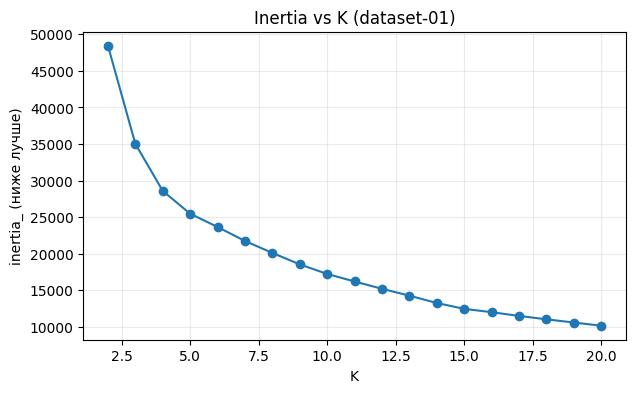

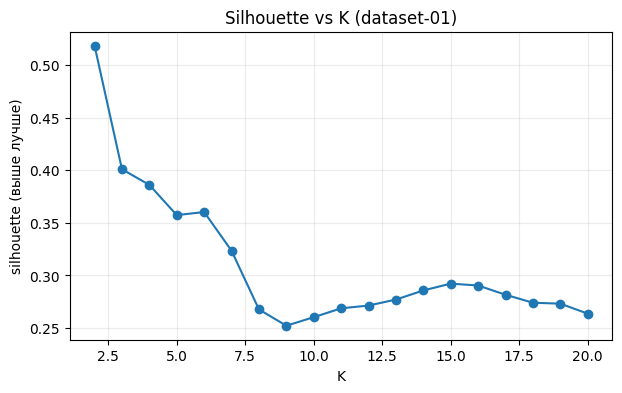

Best K (by silhouette): 2

DBSCAN grid (top-10 by silhouette, then min noise):
    eps  min_samples  n_points  n_clusters  n_noise  noise_share  silhouette  \
17  0.5           12     12000           5      882     0.073500    0.395557   
18  0.6           12     12000           5      278     0.023167    0.386871   
11  0.6            8     12000           5      190     0.015833    0.383393   
4   0.6            5     12000           5      130     0.010833    0.383209   
6   1.0            5     12000           4        7     0.000583    0.382012   
19  0.8           12     12000           5       33     0.002750    0.381408   
12  0.8            8     12000           5       23     0.001917    0.379302   
13  1.0            8     12000           4        8     0.000667    0.375652   
20  1.0           12     12000           4        8     0.000667    0.375652   
14  0.2           12     12000          16    11764     0.980333    0.373896   

    calinski_harabasz  davies_bouldin  


In [57]:
res1 = run_dataset_models("dataset-01", X1, pre1)


===== dataset-02 =====


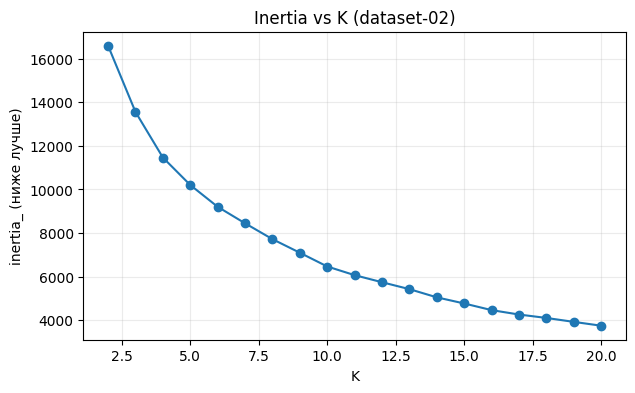

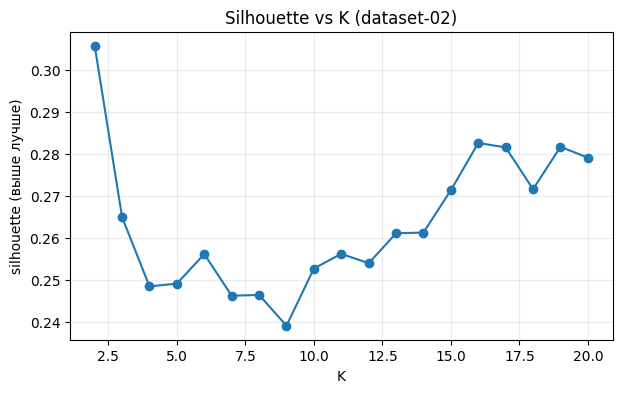

Best K (by silhouette): 2

DBSCAN grid (top-10 by silhouette, then min noise):
    eps  min_samples  n_points  n_clusters  n_noise  noise_share  silhouette  \
18  0.6           12      8000           2      471     0.058875    0.310170   
19  0.8           12      8000           5      166     0.020750    0.278141   
11  0.6            8      8000           8      358     0.044750    0.234271   
10  0.5            8      8000           3      495     0.061875    0.189386   
2   0.4            5      8000           8      495     0.061875    0.117400   
4   0.6            5      8000          12      181     0.022625    0.094807   
1   0.3            5      8000           5      579     0.072375    0.085672   
14  0.2           12      8000           4     1329     0.166125    0.032377   
7   0.2            8      8000           7     1038     0.129750   -0.012099   
0   0.2            5      8000           9      816     0.102000   -0.028133   

    calinski_harabasz  davies_bouldin  


In [58]:
res2 = run_dataset_models("dataset-02", X2, pre2)


===== dataset-03 =====


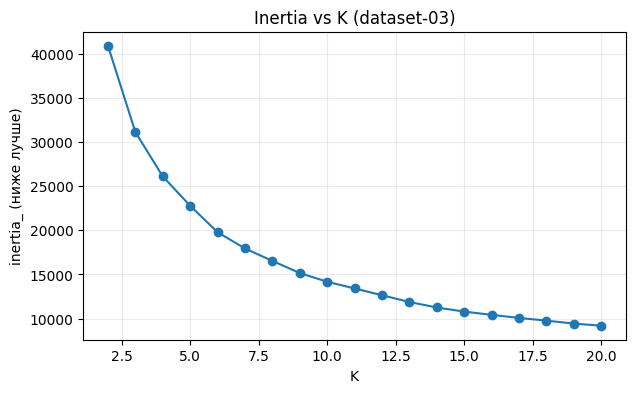

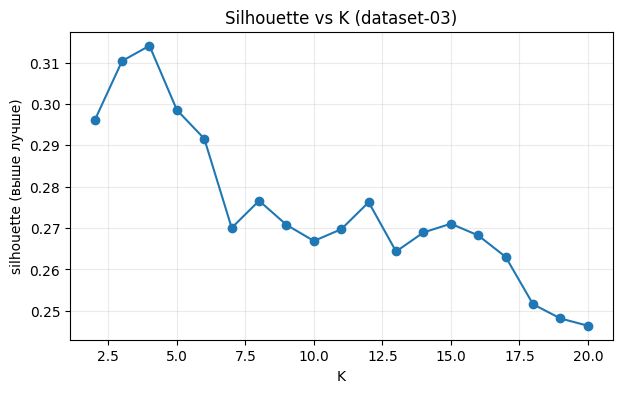

Best K (by silhouette): 4

DBSCAN grid (top-10 by silhouette, then min noise):
    eps  min_samples  n_points  n_clusters  n_noise  noise_share  silhouette  \
14  0.2           12     15000          23     9526     0.635067    0.216252   
9   0.4            8     15000           4      964     0.064267    0.190580   
11  0.6            8     15000           3      222     0.014800    0.170220   
15  0.3           12     15000           7     3722     0.248133    0.169630   
17  0.5           12     15000           2      539     0.035933    0.152313   
10  0.5            8     15000           2      440     0.029333    0.147436   
4   0.6            5     15000           4      152     0.010133    0.097233   
2   0.4            5     15000           6      743     0.049533    0.056687   
7   0.2            8     15000          56     8013     0.534200    0.046024   
3   0.5            5     15000           4      333     0.022200    0.045731   

    calinski_harabasz  davies_bouldin  


In [59]:
res3 = run_dataset_models("dataset-03", X3, pre3)

#### 2.3.4. Метрики качества (обязательно)

In [60]:
def compute_metrics_for_model(X_scaled, labels, *, drop_noise=False):
    """
    Считает silhouette / DB / CH.
    Для DBSCAN: drop_noise=True -> считаем метрики на non-noise точках (labels != -1).
    """
    labels = np.asarray(labels)
    noise_share = float(np.mean(labels == -1)) if np.any(labels == -1) else 0.0

    if drop_noise:
        mask = labels != -1
        X_eval = X_scaled[mask]
        y_eval = labels[mask]
        eval_note = "non-noise (labels != -1)"
    else:
        X_eval = X_scaled
        y_eval = labels
        eval_note = "all points"

    # метрики определены только при >=2 кластера
    if len(X_eval) == 0 or len(set(y_eval.tolist())) < 2:
        return {
            "noise_share": noise_share,
            "eval_note": eval_note,
            "silhouette": np.nan,
            "davies_bouldin": np.nan,
            "calinski_harabasz": np.nan,
        }

    # silhouette ускоряем (как выше)
    sample_size = min(2000, len(X_eval))
    sil = silhouette_score(X_eval, y_eval, sample_size=sample_size, random_state=RANDOM_STATE)

    return {
        "noise_share": noise_share,
        "eval_note": eval_note,
        "silhouette": float(sil),
        "davies_bouldin": float(davies_bouldin_score(X_eval, y_eval)),
        "calinski_harabasz": float(calinski_harabasz_score(X_eval, y_eval)),
    }

In [61]:
def metrics_for_dataset(res):
    name = res["dataset"]
    X_scaled = res["X_scaled"]

    # KMeans: метрики на всех точках
    m_km = compute_metrics_for_model(X_scaled, res["labels_kmeans"], drop_noise=False)

    # DBSCAN: долю шума выводим явно, метрики считаем на non-noise
    m_db = compute_metrics_for_model(X_scaled, res["labels_dbscan"], drop_noise=True)
    print(f"{name} | DBSCAN noise_share = {m_db['noise_share']:.3f} (metrics on {m_db['eval_note']})")

    return pd.DataFrame([
        {"dataset": name, "model": "KMeans", **m_km},
        {"dataset": name, "model": "DBSCAN", **m_db},
    ])


In [64]:
df_metrics = pd.concat([
    metrics_for_dataset(res1),
    metrics_for_dataset(res2),
    metrics_for_dataset(res3),
], ignore_index=True)

print("Final clustering metrics:")
print(df_metrics)

dataset-01 | DBSCAN noise_share = 0.073 (metrics on non-noise (labels != -1))
dataset-02 | DBSCAN noise_share = 0.059 (metrics on non-noise (labels != -1))
dataset-03 | DBSCAN noise_share = 0.635 (metrics on non-noise (labels != -1))
Final clustering metrics:
      dataset   model  noise_share                 eval_note  silhouette  \
0  dataset-01  KMeans     0.000000                all points    0.518516   
1  dataset-01  DBSCAN     0.073500  non-noise (labels != -1)    0.395557   
2  dataset-02  KMeans     0.000000                all points    0.305796   
3  dataset-02  DBSCAN     0.058875  non-noise (labels != -1)    0.310170   
4  dataset-03  KMeans     0.000000                all points    0.314090   
5  dataset-03  DBSCAN     0.635067  non-noise (labels != -1)    0.216252   

   davies_bouldin  calinski_harabasz  
0        0.685330       11786.954623  
1        1.184960        8749.295115  
2        1.323472        3573.393333  
3        0.691878          36.490757  
4        1.1

Для DBSCAN отдельно выводим долю шума (label = -1). Метрики качества считаем на non-noise точках (labels != -1), так как включение шума делает метрики трудно интерпретируемыми

#### 2.3.5. Визуализация (обязательно)

In [65]:
# Визуализация кластеризаций в 2D (PCA)
from sklearn.decomposition import PCA

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    # PCA(2D) именно для визуализации
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    # Scatter 2D с раскраской по меткам
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

In [66]:
# Выбираем лучший алгоритм для каждого датасета
def pick_best_solution(dataset_name, res, df_metrics):
    
    # - сравниваем KMeans vs DBSCAN
    # - если DBSCAN silhouette NaN -> выбираем KMeans
    
    sub = df_metrics[df_metrics["dataset"] == dataset_name].copy()

    km_row = sub[sub["model"] == "KMeans"].iloc[0]
    db_row = sub[sub["model"] == "DBSCAN"].iloc[0]

    km_sil = km_row["silhouette"]
    db_sil = db_row["silhouette"]

    if (not np.isnan(db_sil)) and (np.isnan(km_sil) or db_sil > km_sil):
        # победил DBSCAN
        return {
            "best_model": "DBSCAN",
            "labels": res["labels_dbscan"],
            "params": res["best_dbscan"],
            "silhouette": db_sil,
        }
    else:
        # победил KMeans
        return {
            "best_model": "KMeans",
            "labels": res["labels_kmeans"],
            "params": {"k": res["best_k"]},
            "silhouette": km_sil,
        }

In [69]:
# PCA графики для каждого датасета 
def plot_best_pca_for_dataset(dataset_name, res, df_metrics):
    best = pick_best_solution(dataset_name, res, df_metrics)

    X_plot2d = pca_2d_for_plot(res["X_scaled"], random_state=RANDOM_STATE)

    title = (
        f"PCA(2D): best = {best['best_model']} | params={best['params']} | "
        f"silhouette={best['silhouette']:.3f}" if not np.isnan(best["silhouette"]) else
        f"PCA(2D): best = {best['best_model']} | params={best['params']} | silhouette=NaN"
    )

    # Важно: для DBSCAN шум имеет label=-1 
    plot_2d_embedding(X_plot2d, best["labels"], title=title)
    
    
# Доп. графики DBSCAN (по одному на датасет)
def plot_dbscan_silhouette_vs_eps(res, dataset_name):
    df = res["dbscan_grid"].copy()

    # берём только варианты, где silhouette посчитался
    df = df[df["silhouette"].notna()].copy()
    if len(df) == 0:
        print(f"{dataset_name}: DBSCAN silhouette is NaN for all configs -> skip silhouette vs eps plot.")
        return

    # фиксируем min_samples: возьмём тот, который чаще встречается среди топ-конфигов
    top = df.sort_values(["silhouette", "noise_share"], ascending=[False, True]).head(20)
    ms_best = int(top["min_samples"].mode().iloc[0])

    df_ms = df[df["min_samples"] == ms_best].sort_values("eps")

    plt.figure(figsize=(7, 4))
    plt.plot(df_ms["eps"], df_ms["silhouette"], marker="o")
    plt.title(f"{dataset_name}: DBSCAN silhouette vs eps (min_samples={ms_best})")
    plt.xlabel("eps")
    plt.ylabel("silhouette (non-noise)")
    plt.grid(True, alpha=0.25)
    plt.show()

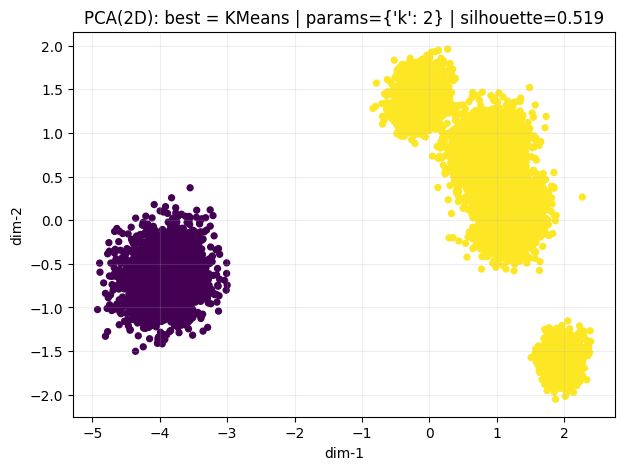

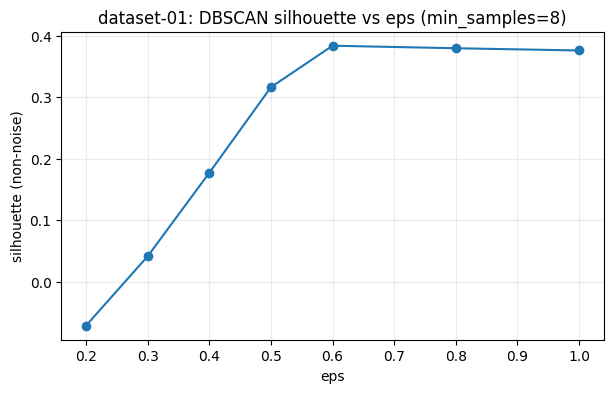

In [73]:
# 1 датасет
plot_best_pca_for_dataset("dataset-01", res1, df_metrics)
plot_dbscan_silhouette_vs_eps(res1, "dataset-01")

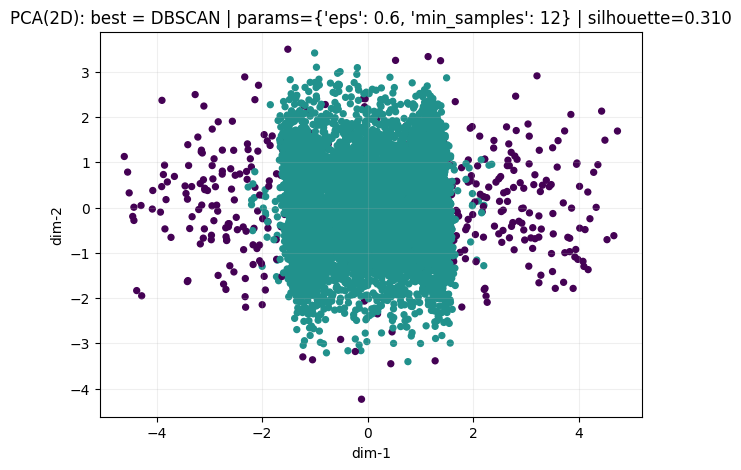

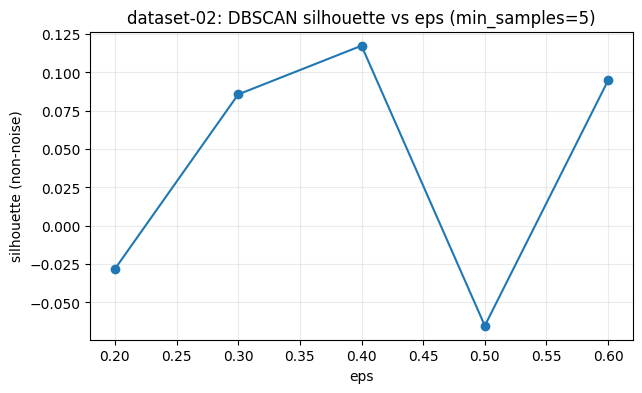

In [74]:
# 2 датасет
plot_best_pca_for_dataset("dataset-02", res2, df_metrics)
plot_dbscan_silhouette_vs_eps(res2, "dataset-02")

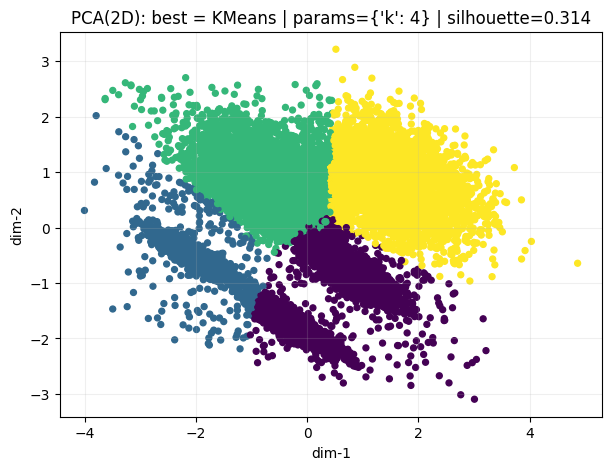

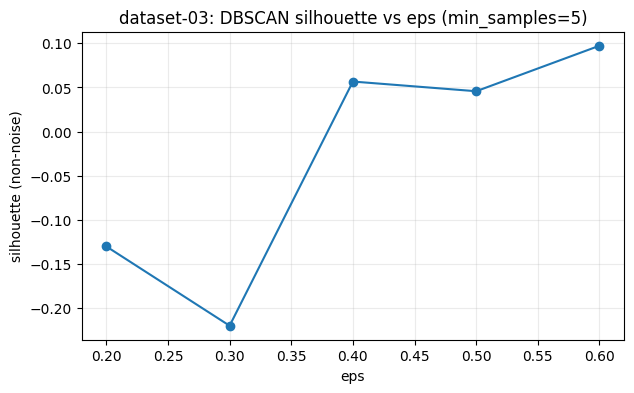

In [75]:
# 3 датасет
plot_best_pca_for_dataset("dataset-03", res3, df_metrics)
plot_dbscan_silhouette_vs_eps(res3, "dataset-03")

#### 2.3.6. Устойчивость (обязательно, но только для одного датасета)

**Лучше всего брать dataset-01 (там KMeans “естественно” хорошо работает, и устойчивость будет наглядной)**

In [76]:
from sklearn.metrics import adjusted_rand_score

# Устойчивость KMeans: попарные ARI для разных random_state
def kmeans_stability_ari(X, preprocessor, k, seeds=(0, 1, 2, 3, 4), n_init=10):
    # Единый scaling
    X_scaled = preprocessor.fit_transform(X)

    labels_list = []
    for s in seeds:
        model = KMeans(n_clusters=int(k), random_state=int(s), n_init=n_init)
        labels = model.fit_predict(X_scaled)
        labels_list.append(labels)

    # попарные ARI
    rows = []
    for i in range(len(seeds)):
        for j in range(i + 1, len(seeds)):
            ari = adjusted_rand_score(labels_list[i], labels_list[j])
            rows.append({"seed_i": seeds[i], "seed_j": seeds[j], "ARI": float(ari)})

    df_ari = pd.DataFrame(rows)
    return df_ari

# Пример: устойчивость на dataset-01 (берём best_k из res1)

df_ari_01 = kmeans_stability_ari(X1, pre1, k=res1["best_k"], seeds=(0,1,2,3,4), n_init=10)

print("KMeans stability (dataset-01) — pairwise ARI:")
print(df_ari_01)
print("\nARI summary:")
print(df_ari_01["ARI"].describe())

KMeans stability (dataset-01) — pairwise ARI:
   seed_i  seed_j  ARI
0       0       1  1.0
1       0       2  1.0
2       0       3  1.0
3       0       4  1.0
4       1       2  1.0
5       1       3  1.0
6       1       4  1.0
7       2       3  1.0
8       2       4  1.0
9       3       4  1.0

ARI summary:
count    10.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: ARI, dtype: float64


Для dataset-01 проверила устойчивость KMeans: 5 запусков с разными random_state и попарный ARI между разбиениями. Во всех сравнениях ARI = 1.0, значит разбиения идентичны. Следовательно, решение KMeans для выбранного k полностью устойчиво к инициализации и может считаться надёжным для этого датасета.

#### 2.3.7. Итог по каждому датасету (обязательно)

- **Dataset-01 — Итог**

Выбор: **KMeans** (k=2, random_state=42, n_init=10).
После StandardScaler он даёт высокое качество: silhouette = 0.5185, Davies–Bouldin = 0.685 (ниже лучше) и Calinski–Harabasz = 11786.95 (выше лучше). Это согласуется с PCA(2D): видно два хорошо разделённых компактных облака, что соответствует предпосылкам KMeans. Основная сложность здесь — разные масштабы признаков, поэтому без стандартизации разбиение было бы некорректным. DBSCAN при лучшем подборе (eps=0.5, min_samples=12) показывает хуже качество (silhouette = 0.3956) и даёт шум (noise_share = 0.073), хотя метрики считались на non-noise точках. Дополнительно KMeans устойчив: 5 запусков с разными random_state дали ARI=1.0, то есть разбиения полностью совпадают. Поэтому KMeans здесь и точнее по метрикам, и надёжнее по устойчивости.

- **Dataset-02 — Итог**

Выбор: **DBSCAN** (eps=0.6, min_samples=12).
В этом датасете DBSCAN чуть лучше (0.3102) и при этом явно отделяет шум, что важно для структуры этого датасета. Доля шума умеренная (noise_share = 0.059), а метрики считались на non-noise точках, чтобы оценка не искажалась выбросами. KMeans даёт сопоставимое качество (silhouette = 0.3058), но вынужден натягивать компактные кластеры на данные с выбросами и потенциальной нелинейностью. При подборе параметров DBSCAN ключевая сложность — чувствительность к eps: слишком маленький превращает почти всё в шум, а слишком большой сливает кластеры. Визуально (PCA) DBSCAN выглядит более естественно: плотное ядро выделяется отдельно, а выбросы не портят кластеры. Поэтому выбор DBSCAN здесь объясняется не только метрикой, но и корректной обработкой шума/выбросов.

- **Dataset-03 — Итог**

Выбор: **KMeans** (k=4, random_state=42, n_init=10).
KMeans даёт более высокое качество по метрикам: silhouette = 0.3141 против 0.2163 у DBSCAN. У DBSCAN при лучшей конфигурации (eps=0.2, min_samples=12) слишком большая доля шума (noise_share = 0.635), то есть большинство точек маркируются как -1 и выпадают из кластеров. Это типичная проблема DBSCAN на данных с разной плотностью: один eps плохо подходит сразу всем кластерам и фону. В PCA(2D) у KMeans видны несколько групп, хотя есть перекрытия на границах, поэтому silhouette остаётся умеренным, но разбиение интерпретируемым. Поэтому KMeans здесь выбран как более стабильный и практически полезный вариант без деградации в огромный шум.

### 2.4. Артефакты эксперимента (обязательно)

In [81]:
# 1) Помощники для сохранения артефактов
def write_json(obj, filename):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

def pca_2d(X_scaled):
    p = PCA(n_components=2, random_state=RANDOM_STATE)
    return p.fit_transform(X_scaled)

def save_pca_scatter_png(X_scaled, labels, title, filename):
    emb = pca_2d(X_scaled)
    plt.figure(figsize=(7, 5))
    plt.scatter(emb[:, 0], emb[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.savefig(filename, dpi=160)
    plt.close()

def save_silhouette_vs_k_png(res, dataset_name, filename):
    km = res["kmeans_k_metrics"]
    k = km["k"]
    sil = km["silhouette"]

    plt.figure(figsize=(7, 4))
    plt.plot(k, sil, marker="o")
    plt.title(f"{dataset_name}: silhouette vs k")
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.grid(True, alpha=0.25)
    plt.tight_layout()
    plt.savefig(filename, dpi=160)
    plt.close()

def pick_best_solution(dataset_name, res, df_metrics):
    sub = df_metrics[df_metrics["dataset"] == dataset_name].copy()
    km_row = sub[sub["model"] == "KMeans"].iloc[0]
    db_row = sub[sub["model"] == "DBSCAN"].iloc[0]

    km_sil = float(km_row["silhouette"]) if pd.notna(km_row["silhouette"]) else np.nan
    db_sil = float(db_row["silhouette"]) if pd.notna(db_row["silhouette"]) else np.nan

    if (not np.isnan(db_sil)) and (np.isnan(km_sil) or db_sil > km_sil):
        return {
            "best_model": "DBSCAN",
            "best_params": res["best_dbscan"],
            "criterion": "max silhouette (DBSCAN on non-noise: labels != -1)",
            "silhouette": db_sil,
            "labels": res["labels_dbscan"],
        }
    else:
        return {
            "best_model": "KMeans",
            "best_params": {"k": int(res["best_k"])},
            "criterion": "max silhouette (KMeans on all points)",
            "silhouette": km_sil,
            "labels": res["labels_kmeans"],
        }

# -----------------------
# 2) Метрики: metrics_summary.json
# -----------------------
metrics_summary = []
for _, row in df_metrics.iterrows():
    metrics_summary.append({
        "dataset": row["dataset"],
        "model": row["model"],
        "noise_share": float(row["noise_share"]) if pd.notna(row["noise_share"]) else None,
        "eval_note": str(row["eval_note"]),
        "silhouette": float(row["silhouette"]) if pd.notna(row["silhouette"]) else None,
        "davies_bouldin": float(row["davies_bouldin"]) if pd.notna(row["davies_bouldin"]) else None,
        "calinski_harabasz": float(row["calinski_harabasz"]) if pd.notna(row["calinski_harabasz"]) else None,
    })

write_json(metrics_summary, "artifacts/metrics_summary.json")
print("Saved artifacts/metrics_summary.json")

# -----------------------
# 3) Лучшие конфигурации + артефакты
# -----------------------
datasets = [
    ("dataset-01", d1, res1, "ds1"),
    ("dataset-02", d2, res2, "ds2"),
    ("dataset-03", d3, res3, "ds3"),
]

best_configs = {}

for ds_name, df_raw, res, tag in datasets:
    best = pick_best_solution(ds_name, res, df_metrics)

    best_configs[ds_name] = {
        "best_model": best["best_model"],
        "best_params": best["best_params"],
        "criterion": best["criterion"],
        "silhouette": best["silhouette"],
    }

    # labels CSV: sample_id,cluster_label
    out_csv = f"artifacts/labels/labels_hw07_{tag}.csv"
    pd.DataFrame({
        "sample_id": df_raw["sample_id"].values,
        "cluster_label": np.asarray(best["labels"], dtype=int),
    }).to_csv(out_csv, index=False)
    print("Saved", out_csv)

    # PCA scatter PNG (best solution)
    out_pca = f"artifacts/figures/pca_best_{tag}.png"
    title = f"PCA(2D): best={best['best_model']} params={best['best_params']} sil={best['silhouette']}"
    save_pca_scatter_png(res["X_scaled"], best["labels"], title, out_pca)
    print("Saved", out_pca)

    # silhouette vs k PNG (подбор параметров KMeans)
    out_k = f"artifacts/figures/silhouette_vs_k_{tag}.png"
    save_silhouette_vs_k_png(res, ds_name, out_k)
    print("Saved", out_k)

write_json(best_configs, "artifacts/best_configs.json")
print("Saved artifacts/best_configs.json")

Saved artifacts/metrics_summary.json
Saved artifacts/labels/labels_hw07_ds1.csv
Saved artifacts/figures/pca_best_ds1.png
Saved artifacts/figures/silhouette_vs_k_ds1.png
Saved artifacts/labels/labels_hw07_ds2.csv
Saved artifacts/figures/pca_best_ds2.png
Saved artifacts/figures/silhouette_vs_k_ds2.png
Saved artifacts/labels/labels_hw07_ds3.csv
Saved artifacts/figures/pca_best_ds3.png
Saved artifacts/figures/silhouette_vs_k_ds3.png
Saved artifacts/best_configs.json
